In [12]:
from data.dp import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = {
    'data_provider': 'data.MPII.dp',
    'network': 'models.posenet.PoseNet',
    'inference': {
        'nstack': 8,
        'inp_dim': 256,
        'oup_dim': 16,
        'num_parts': 16,
        'increase': 0,
        'keys': ['imgs'],
        'num_eval': 2958, ## number of val examples used. entire set is 2958
        'train_num_eval': 300, ## number of train examples tested at test time
    },

    'train': {
        'batchsize': 16,
        'input_res': 256,
        'output_res': 64,
        'train_iters': 1000,
        'valid_iters': 10,
        'learning_rate': 1e-3,
        'max_num_people' : 1,
        'loss': [
            ['combined_hm_loss', 1],
        ],
        'decay_iters': 100000,
        'decay_lr': 2e-4,
        'num_workers': 2,
        'use_data_loader': True,
    },
}

In [3]:
ds = Dataset(config, 'train.h5')

loading data: annot
Done (t=2.74s)


In [4]:
gen = ds.gen()

In [5]:
imgs = []
hms = []
i = 0
for img, hm in gen:
    imgs.append(img)
    hms.append(hm)
    i += 1
    if i > 20:
        break

imgs = np.array(imgs)
hms = np.array(hms)

In [22]:
num = 5

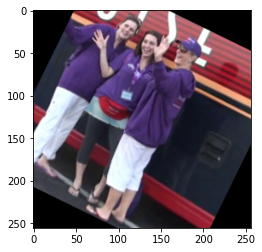

In [23]:
plt.imshow(imgs[num])

(64, 64)


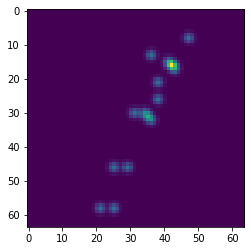

In [24]:
hm = hms[num]
sum_of_hms = np.zeros(hm.shape[1:])
print(sum_of_hms.shape)
for i in range(hm.shape[0]):
    sum_of_hms += hm[i]
plt.imshow(sum_of_hms)